In [2]:
#  Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
# Calling the API
import requests

url = "https://api.football-data.org/v4/competitions/PL/matches?season=2024"
headers = {"X-Auth-Token": "11036f602172409c9a5f0765dd9d41f3"}

response = requests.get(url, headers=headers)
data = response.json()





In [4]:
# exploring how JSON Looks Like
import json
print(json.dumps(data, indent=2))


{
  "filters": {
    "season": 2024
  },
  "resultSet": {
    "count": 380,
    "first": "2024-08-16",
    "last": "2025-05-25",
    "played": 380
  },
  "competition": {
    "id": 2021,
    "name": "Premier League",
    "code": "PL",
    "type": "LEAGUE",
    "emblem": "https://crests.football-data.org/PL.png"
  },
  "matches": [
    {
      "area": {
        "id": 2072,
        "name": "England",
        "code": "ENG",
        "flag": "https://crests.football-data.org/770.svg"
      },
      "competition": {
        "id": 2021,
        "name": "Premier League",
        "code": "PL",
        "type": "LEAGUE",
        "emblem": "https://crests.football-data.org/PL.png"
      },
      "season": {
        "id": 2287,
        "startDate": "2024-08-16",
        "endDate": "2025-05-25",
        "currentMatchday": 38,
        "winner": null
      },
      "id": 497410,
      "utcDate": "2024-08-16T19:00:00Z",
      "status": "FINISHED",
      "matchday": 1,
      "stage": "REGULAR_SEASON",
 

In [5]:
# Extracting only the list of matches
matches = data['matches']


In [6]:
#Create DataFrame
df = pd.json_normalize(matches)
df.head()# # Showing a preview( top five rows)

,id,utcDate,status,matchday,stage,group,lastUpdated,referees,area.id,area.name,...,awayTeam.shortName,awayTeam.tla,awayTeam.crest,score.winner,score.duration,score.fullTime.home,score.fullTime.away,score.halfTime.home,score.halfTime.away,odds.msg
0,497410,2024-08-16T19:00:00Z,FINISHED,1,REGULAR_SEASON,None,2025-06-08T20:20:25Z,"[{'id': 11446, 'name': 'Robert Jones', 'type':...",2072,England,...,Fulham,FUL,https://crests.football-data.org/63.png,HOME_TEAM,REGULAR,1,0,0,0,Activate Odds-Package in User-Panel to retriev...
1,497411,2024-08-17T11:30:00Z,FINISHED,1,REGULAR_SEASON,None,2025-06-08T20:20:25Z,"[{'id': 11396, 'name': 'Tim Robinson', 'type':...",2072,England,...,Liverpool,LIV,https://crests.football-data.org/64.png,AWAY_TEAM,REGULAR,0,2,0,0,Activate Odds-Package in User-Panel to retriev...
2,497412,2024-08-17T14:00:00Z,FINISHED,1,REGULAR_SEASON,None,2025-06-08T20:20:25Z,"[{'id': 23568, 'name': 'Jarred Gillett', 'type...",2072,England,...,Wolverhampton,WOL,https://crests.football-data.org/76.png,HOME_TEAM,REGULAR,2,0,1,0,Activate Odds-Package in User-Panel to retriev...
3,497413,2024-08-17T14:00:00Z,FINISHED,1,REGULAR_SEASON,None,2025-06-08T20:20:25Z,"[{'id': 11430, 'name': 'Simon Hooper', 'type':...",2072,England,...,Brighton Hove,BHA,https://crests.football-data.org/397.png,AWAY_TEAM,REGULAR,0,3,0,1,Activate Odds-Package in User-Panel to retriev...
4,497414,2024-08-17T14:00:00Z,FINISHED,1,REGULAR_SEASON,None,2025-06-08T20:20:25Z,"[{'id': 11585, 'name': 'Craig Pawson', 'type':...",2072,England,...,Southampton,SOU,https://crests.football-data.org/340.png,HOME_TEAM,REGULAR,1,0,1,0,Activate Odds-Package in User-Panel to retriev...


In [ ]:
#To work with useful data like teams and scores:
df_matches = df[[
    'matchday',
    'homeTeam.name',
    'awayTeam.name',
    'score.fullTime.home',
    'score.fullTime.away',
    'status',
    'utcDate'
]].rename(columns={
    'homeTeam.name': 'Home Team',
    'awayTeam.name': 'Away Team',
    'score.fullTime.home': 'Home Score',
    'score.fullTime.away': 'Away Score',
    'utcDate': 'Date'
})

# Display a sample
df_matches.head()


,matchday,Home Team,Away Team,Home Score,Away Score,status,Date
0,1,Manchester United FC,Fulham FC,1,0,FINISHED,2024-08-16T19:00:00Z
1,1,Ipswich Town FC,Liverpool FC,0,2,FINISHED,2024-08-17T11:30:00Z
2,1,Arsenal FC,Wolverhampton Wanderers FC,2,0,FINISHED,2024-08-17T14:00:00Z
3,1,Everton FC,Brighton & Hove Albion FC,0,3,FINISHED,2024-08-17T14:00:00Z
4,1,Newcastle United FC,Southampton FC,1,0,FINISHED,2024-08-17T14:00:00Z


In [11]:
# converting to csv
df_matches.to_csv("premier_league_2024_2025.csv", index=False)


In [10]:
# Initializing Team Statistics
team_stats = {}

for _, row in df_matches.iterrows():
    if row['status'] != 'FINISHED':
        continue  # skip unplayed matches
    
    home = row['Home Team']
    away = row['Away Team']
    home_score = row['Home Score']
    away_score = row['Away Score']

    for team in [home, away]:
        if team not in team_stats:
            team_stats[team] = {'played': 0, 'won': 0}
        team_stats[team]['played'] += 1

    # Determine winner
    if home_score > away_score:
        team_stats[home]['won'] += 1
    elif away_score > home_score:
        team_stats[away]['won'] += 1
    # Draws do not count as wins


In [12]:
#Compute Win Probabilities
win_probs = {
    team: round(stats['won'] / stats['played'], 3)
    for team, stats in team_stats.items()
}


In [13]:
#Create a DataFrame
import pandas as pd

df_win_prob = pd.DataFrame(
    [(team, stats['played'], stats['won'], win_probs[team])
     for team, stats in team_stats.items()],
    columns=['Team', 'Matches Played', 'Wins', 'Win Probability']
).sort_values(by='Win Probability', ascending=False)

print(df_win_prob)


                          Team  Matches Played  Wins  Win Probability
3                 Liverpool FC              38    25            0.658
17          Manchester City FC              38    21            0.553
4                   Arsenal FC              38    20            0.526
16                  Chelsea FC              38    20            0.526
8          Newcastle United FC              38    20            0.526
10        Nottingham Forest FC              38    19            0.500
13              Aston Villa FC              38    19            0.500
7    Brighton & Hove Albion FC              38    16            0.421
14                Brentford FC              38    16            0.421
1                    Fulham FC              38    15            0.395
11             AFC Bournemouth              38    15            0.395
15           Crystal Palace FC              38    13            0.342
5   Wolverhampton Wanderers FC              38    12            0.316
0         Manchester

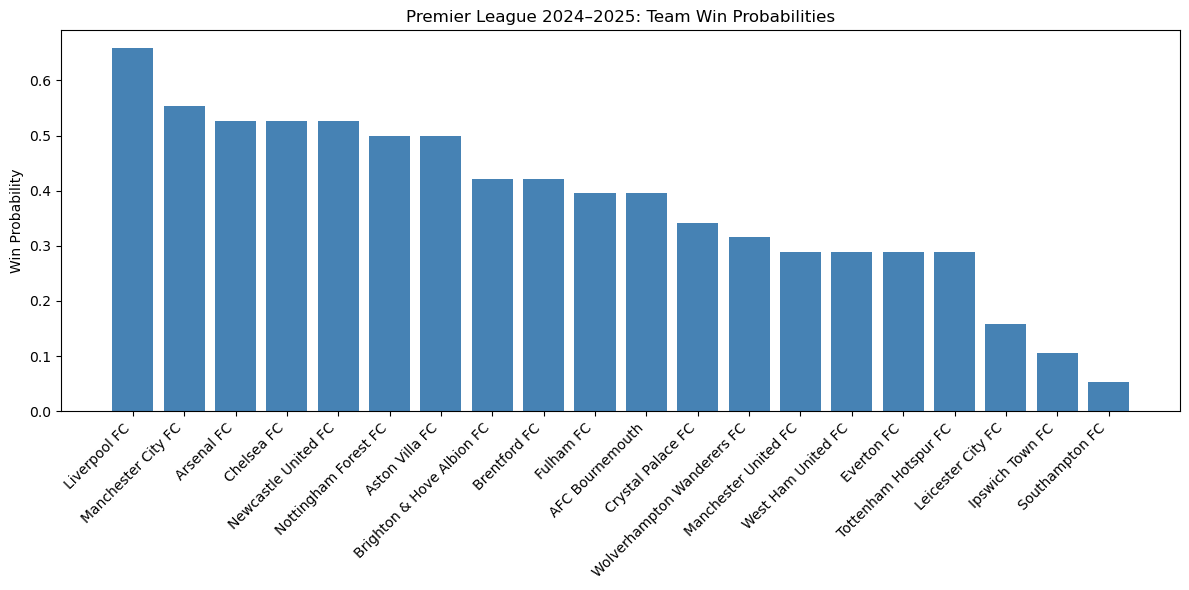

In [14]:
# Bar Chart
plt.figure(figsize=(12, 6))
plt.bar(df_win_prob['Team'], df_win_prob['Win Probability'], color='steelblue')
plt.xticks(rotation=45, ha='right')
plt.title("Premier League 2024–2025: Team Win Probabilities")
plt.ylabel("Win Probability")
plt.tight_layout()
plt.show()
